In [83]:
pip install numpy pandas sklearn

In [84]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [85]:
#Read the data
df=pd.read_csv('/content/sample_data/Constraint_Train.csv', header=None, skiprows=1, encoding='utf-8')
#Get shape and head
df[2] = df[2].replace(['fake', 'real'], [1, 0])
df[1] = df[1].replace('\n', '', regex=True).str.strip()
df.shape
df.head()

,0,1,2
0,1,The CDC currently reports 99031 deaths. In gen...,0
1,2,States reported 1121 deaths a small rise from ...,0
2,3,Politically Correct Woman (Almost) Uses Pandem...,1
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,0
4,5,Populous states can generate large case counts...,0


In [86]:
#DataFlair - Get the labels
labels=df[2]
labels.head()

0    0
1    0
2    1
3    0
4    0
Name: 2, dtype: int64

In [87]:
# #DataFlair - Split the dataset
# x_train,x_test,y_train,y_test=train_test_split(df['tweet'], labels, test_size=0.2, random_state=7)
# print(type(x_test))
#Read the data
df1=pd.read_csv('/content/sample_data/Constraint_Test.csv', header=None, skiprows=1, encoding='utf-8')
df1[2] = df1[2].replace(['fake', 'real'], [1, 0])
df1[1] = df1[1].replace('\n', '', regex=True).str.strip()
#Get shape and head
df1.shape
df1.head()

,0,1,2
0,1,Chinese converting to Islam after realising th...,1
1,2,11 out of 13 people (from the Diamond Princess...,1
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",1
3,4,Mike Pence in RNC speech praises Donald Trump’...,1
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,0


In [88]:
labels1=df1[2]
labels1.head()

0    1
1    1
2    1
3    1
4    0
Name: 2, dtype: int64

In [89]:
x_train=df[1]
y_train=labels
x_test=df1[1]
y_test=labels1
print(('X_train shape:', x_train.shape))
print(('X_test shape:', x_test.shape))
print(('y_train shape:', y_train.shape))
print(('y_test shape:', y_test.shape))

('X_train shape:', (6420,))
('X_test shape:', (2140,))
('y_train shape:', (6420,))
('y_test shape:', (2140,))


In [90]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()

In [91]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

**Passive Aggressive Classifier**

In [92]:
data=x_test
output=y_test

#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [93]:
print(tfidf_train.shape)

(6420, 18179)


In [94]:
features=tfidf_vectorizer.get_feature_names()
print(features)

['00', '000', '00ice', '00pm', '01', '011', '0141', '01ododggyq', '02', '0270saejgu', '03', '033', '03cw1o4cjt', '03hguvcatu', '03kvl3ooxu', '03vmoirydk', '04', '0408', '041461636', '047738491', '04dpqpumxs', '04jepehxp7', '04piswidhw', '05', '054', '058paie38q', '05am', '05nrugoqjs', '06', '062454254', '063661060', '0651', '06zsnqpwu8', '07', '0710', '071xn1cmm9', '08', '0800', '0818', '0840hh9nbs', '0881911', '09', '093020408', '0940', '09kofbfifk', '09rs6dxah5', '0b55tnqvrh', '0bc6jtpg38', '0bluposjae', '0cbk5ykv94', '0clnmzaynm', '0d5kvrnvbe', '0d99flmeyc', '0dajqm41hi', '0djnh0rtwn', '0ejuetbswz', '0erkr6oj3f', '0esau03igl', '0exkc1kf1h', '0fh0oebzyd', '0fo928qone', '0gismgooup', '0go5izgiqf', '0h81pytnx9', '0hb3bfjoaf', '0hggjzunp3', '0ifjcwavyo', '0j0kdfvzxg', '0j6fuatsoa', '0kh7uorfvy', '0kiktvvgpr', '0kpfvguj2a', '0leqxe1cuv', '0lgnecszo9', '0lmzr3kqn4', '0lnm4htcci', '0lswykjxnq', '0muioea9as', '0nfuq0jjds', '0oecvtuvcd', '0pejdsy3pg', '0pgdjkgdbk', '0pp491sxk1', '0q7vqp', '0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [95]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import numpy as np
import itertools

[[1061   59]
 [  76  944]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1120
           1       0.94      0.93      0.93      1020

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Accuracy :  0.9369158878504673
Precison :  0.93708931352915
Recall :  0.9369158878504673
F1 :  0.9369433685216991


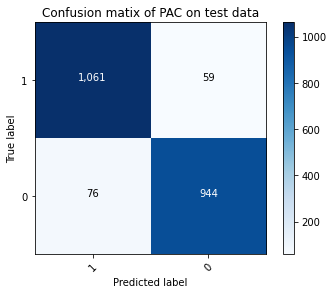

In [151]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
print_metrices(y_pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,y_pred),target_names=[1,0], normalize = False, \
                      title = 'Confusion matix of PAC on test data')

In [97]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred)

array([[1066,   54],
       [  71,  949]])

In [98]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [99]:
stops = set(stopwords.words("english"))
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [100]:
train=x_train
test=x_test

In [101]:
train = train.map(lambda x: cleantext(x))
test = test.map(lambda x: cleantext(x))

**Linear SVM**

SVM
test:
[[1035   85]
 [  57  963]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1120
           1       0.92      0.94      0.93      1020

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140

Accuracy :  0.9336448598130841
Precison :  0.9339066794942277
Recall :  0.9336448598130841
F1 :  0.9336156163068929


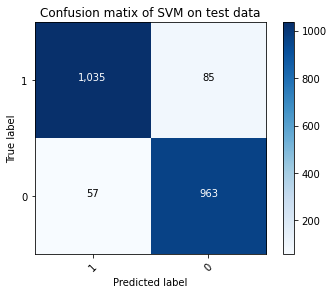

In [152]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LinearSVC())
    ])
fit = pipeline.fit(train,y_train)
print('SVM')
print ('test:')
pred=pipeline.predict(test)
print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[1,0], normalize = False, \
                      title = 'Confusion matix of SVM on test data')


**Logistic Regression**

Logistic Regression
Test:
[[1026   94]
 [  60  960]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1120
           1       0.91      0.94      0.93      1020

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140

Accuracy :  0.9280373831775701
Precison :  0.928436248331108
Recall :  0.9280373831775701
F1 :  0.9280020879862864


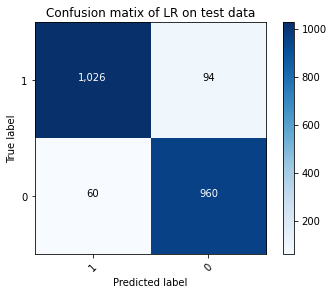

In [155]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LogisticRegression())
    ])
fit = pipeline.fit(train,y_train)
print('Logistic Regression')
print ('Test:')
pred=pipeline.predict(test)

print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[1,0], normalize = False, \
                      title = 'Confusion matix of LR on test data')

**Gradient Boosting Classifier**

Gradient Boost
Test:
[[938 182]
 [ 99 921]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1120
           1       0.83      0.90      0.87      1020

    accuracy                           0.87      2140
   macro avg       0.87      0.87      0.87      2140
weighted avg       0.87      0.87      0.87      2140

Accuracy :  0.8686915887850467
Precison :  0.8712297278724574
Recall :  0.8686915887850467
F1 :  0.8686511293866298


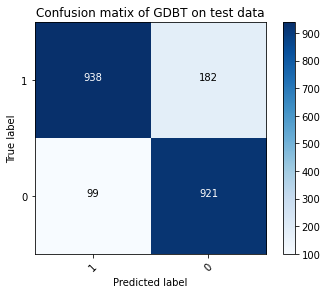

In [171]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', GradientBoostingClassifier())
    ])
fit = pipeline.fit(train,y_train)
print('Gradient Boost')
print ('Test:')
pred=pipeline.predict(test)

print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[1,0], normalize = False, \
                      title = 'Confusion matix of GDBT on test data')

**Decision Tree Classifier**

Decision Tree
Test:
[[969 151]
 [172 848]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1120
           1       0.85      0.83      0.84      1020

    accuracy                           0.85      2140
   macro avg       0.85      0.85      0.85      2140
weighted avg       0.85      0.85      0.85      2140

Accuracy :  0.8490654205607476
Precison :  0.8493971619021441
Recall :  0.8490654205607476
F1 :  0.8491494355029093


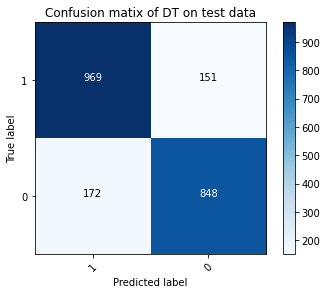

In [165]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', tree.DecisionTreeClassifier())
    ])
fit = pipeline.fit(train,y_train)
print('Decision Tree')
print ('Test:')
pred=pipeline.predict(test)

print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[1,0], normalize = False, \
                      title = 'Confusion matix of DT on test data')

**Random Forest Classifier**

Random Forest Classifier
Test:
[[1007  113]
 [  81  939]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1120
           1       0.89      0.92      0.91      1020

    accuracy                           0.91      2140
   macro avg       0.91      0.91      0.91      2140
weighted avg       0.91      0.91      0.91      2140

Accuracy :  0.9093457943925234
Precison :  0.9096670069897117
Recall :  0.9093457943925234
F1 :  0.9093026764501775


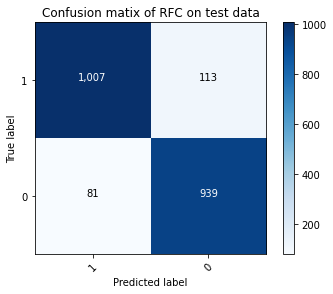

In [180]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', RandomForestClassifier())
    ])
fit = pipeline.fit(train,y_train)
print('Random Forest Classifier')
print ('Test:')
pred=pipeline.predict(test)

print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[1,0], normalize = False, \
                      title = 'Confusion matix of RFC on test data')

In [107]:
print(type(train))

<class 'pandas.core.series.Series'>


**BERT**

In [108]:
# !pip install tensorflow_hub
# !pip install tensorflow_text
# import tensorflow_hub as hub
# import tensorflow_text as text

In [109]:
# preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
# encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [110]:
# bert_preprocess_model = hub.KerasLayer(preprocess_url)

In [111]:
# text_preprocessed = bert_preprocess_model(x_train)
# text_preprocessed.keys()

In [112]:
# print(text_preprocessed)

In [113]:
# bert_model = hub.KerasLayer(encoder_url)

In [114]:
# bert_results = bert_model(text_preprocessed)

In [115]:
# bert_results.keys()

In [116]:
# bert_results['encoder_outputs'][-1] == bert_results['sequence_output']

**LSTM**

In [117]:
import tensorflow as tf
import random
import numpy as np
import pandas as pd
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
import io

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K 
K.clear_session()

# Check tensorflow version
if float(tf.__version__[0]) < 2.0:
  print('Updating tensorflow')
  !pip install tensorflow==2.0
else:
  print('Correct version of Tensorflow installed.')

Correct version of Tensorflow installed.


In [118]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index
vocab_size=len(word_index)
print(vocab_size)

# Padding data

sequences = tokenizer.texts_to_sequences(x_test)
padded = pad_sequences(sequences, maxlen=500, padding='post', truncating='post')

sequences1=tokenizer.texts_to_sequences(x_train)
padded1 = pad_sequences(sequences1, maxlen=500, padding='post', truncating='post')

19955


In [119]:
train_data = padded1
train_labels = y_train.values
test_data = padded
test_labels = y_test.values

In [120]:
# Import tensor representations for words

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;
#print(len(coefs))

embeddings_matrix = np.zeros((vocab_size+1, 100));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2022-02-13 15:42:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.217.128, 173.194.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-02-13 15:42:40 ERROR 404: Not Found.



In [121]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, 100, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(20, return_sequences=True),
    tf.keras.layers.LSTM(20),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dropout(0.3),  
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [122]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

history = model.fit(train_data, train_labels, epochs=5, batch_size=100, validation_data=[test_data, test_labels])

print("Training Complete")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         1995600   
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, None, 20)          6800      
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                        

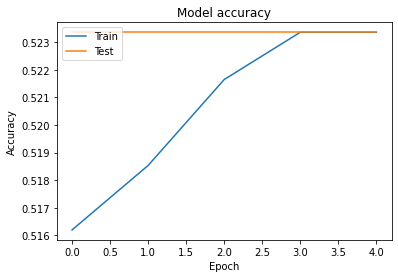

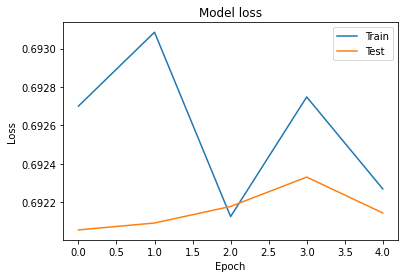

In [123]:
# Visualize the results:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

[[1120    0]
 [1020    0]]
              precision    recall  f1-score   support

           0       0.52      1.00      0.69      1120
           1       0.00      0.00      0.00      1020

    accuracy                           0.52      2140
   macro avg       0.26      0.50      0.34      2140
weighted avg       0.27      0.52      0.36      2140

Accuracy :  0.5233644859813084
Precison :  1.0
Recall :  0.5233644859813084
F1 :  0.6871165644171778


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

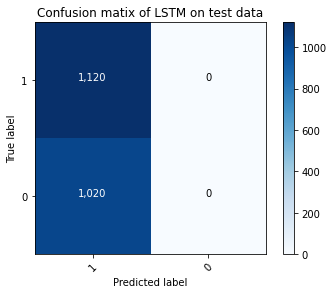

In [124]:
y_pred=np.round(model.predict(test_data))
print_metrices(y_pred,test_labels)
plot_confusion_matrix(confusion_matrix(test_labels,y_pred),target_names=[1,0], normalize = False, \
                      title = 'Confusion matix of LSTM on test data')

In [125]:
import tensorflow as tf
model1 = tf.keras.models.load_model('/content/sample_data/model121.h5')
print(model1)

In [126]:
import re

text = """\
Mr. Smith bought cheapsite.com for 1.5 million dollars, i.e. he paid a lot for it. Did he mind? Adam Jones Jr. thinks he didn't. In any case, this isn't true... Well, with a probability of .9 it isn't.
"""
sentences = re.split('(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)(\s|[A-Z].*)',text)

for stuff in sentences:
        print(stuff)  

Mr. Smith bought cheapsite.com for 1.5 million dollars, i.e. he paid a lot for it.
 
Did he mind?
 
Adam Jones Jr. thinks he didn't.
 
In any case, this isn't true...
 
Well, with a probability of .9 it isn't.





In [127]:
#this step is done so that tokenizer is fitted on training data of septic classsification task
import re
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

real_data=pd.read_csv("/content/sample_data/News.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8')
septic_data = pd.read_csv("/content/sample_data/train.csv", header=None, skipinitialspace=True , encoding='utf-8') 
# septic_data=septic_data.drop(0, axis=1)
# septic_data=septic_data.drop(1, axis=1)
# septic_data.rename(columns = {2: 0, 3: 1}, inplace = True)
#fake_data= fake_data.iloc[:,1:]
real_data[1] = real_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
#septic_data[1] = septic_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
    
news_data= pd.concat([real_data, septic_data], axis=0)
    
# print a summary of the data in news_data
#print(news_data[1])
#news_data[1] = news_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
news_data[0] = news_data[0].replace('\n', '', regex=True).str.strip()
#news_data.head(20)
print(news_data.head(20))
print(real_data.head(20))
print(septic_data.head(20))
    
labels=news_data[1]
labels.head()     
#print(type(labels))
    
#news_data[1].value_counts()
    
X = news_data[0]
Y=news_data[1]
x_train1,x_test1,y_train1,y_test1=train_test_split(X, Y, test_size=0.05, random_state=7)
#print(type(x_test))
#print(x_train.shape , y_train.shape)
    
    
x_train1 = x_train1.str.replace('\d+', '') # removing all numbers
#x_train
    
x_test1 = x_test1.str.replace('\d+', '')
#x_test
    
from nltk.corpus import stopwords
stop = stopwords.words('english')
    
x_train1 = x_train1.apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))
#x_train
    
x_test1 = x_test1.apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))
#x_test
    
tokenizer = Tokenizer(num_words=None) #adding this parameter can  responsible for setting the size of the vocabulary i.e the most common num_words
tokenizer.fit_on_texts(x_train1)

                                                    0  1
0   The political predicament also appears to be t...  0
1   The CM had planned to meet the duo when he com...  0
2   He’s now scheduled to visit New Delhi on Thurs...  0
3   “If he fails to do so, he would face open rebe...  0
4   “Further delay is likely. Despite threats from...  0
5   “The party should make a concerted effort to i...  0
6   Taking serious note of allegations pertaining ...  0
7   Panchayat raj and mining minister Pedireddy Ra...  0
8   Sources said the party legislator reportedly s...  0
9   The legislator is his report said that large q...  0
10  The legislator claimed that the gravel was ext...  0
11  “The Mandal Parishad Development Officers (MPD...  0
12  He submitted also certain documents to substan...  0
13  “The MPDOs requisitioned for supply of about 8...  0
14  He said that massive illegal mining had not on...  0
15  The legislator said that field level officials...  0
16  Curiously, an MPDO, who is 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: FutureWarning: The default value of regex will change from True to False in a future version.


In [128]:
y=[]
k=1
for x in x_train:
    x = re.sub("\d+", "", x) # removing all numbers
    #print(x)
    stop = stopwords.words('english')
    x = (' '.join([word for word in x.split() if word not in (stop)]))
    #print(x)
    x1=[]
    sentences = re.split('(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)(\s|[A-Z].*)',str(x))
    for stuff in sentences:
        x1.append(stuff)
#     tokenizer = Tokenizer(num_words=8656) #adding this parameter can  responsible for setting the size of the vocabulary i.e the most common num_words
#     tokenizer.fit_on_texts(x1)
#     vocab_size = len(tokenizer.word_index) + 1  
    data = []
    punc = '.'
    for i in x1:
        i = i[:-1]
        token = word_tokenize(i)
        if punc in token:
            for index ,val in enumerate(token):
                if punc == val:
                    token.pop(index)         
        data.append(token)

    x1= tokenizer.texts_to_sequences(data) 

    maxlen = 100
    x1 = pad_sequences(x1, padding='post', maxlen=maxlen)
    #print(x1)
    #break;
    
    pred= model1.predict(x1)
    #print(pred)
    #print(type(pred))
    c1=0
    c2=0
    for a in pred:
        #print(a.shape)
        if(int(round(a[0]))== 0):
            c1+=1
        else:
            c2+=1
    
    if(c1>c2): b=0
    else: b=1
    if(c2>=1): d=1
    else: d=0
    preds=[np.mean(pred),np.max(pred),np.min(pred),np.median(pred),b,d]
    #print(pred)
    #print(type(pred))
    y.append(preds)
    print(k)
    k+=1


Streaming output truncated to the last 5000 lines.
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610

In [129]:
print('Type of y: ',type(y))
y=np.array(y)
print(('y shape:', y.shape))
print(y)


Type of y:  <class 'list'>
('y shape:', (6420, 6))
[[3.11002910e-01 6.18180811e-01 4.88013029e-04 2.30703205e-01
  0.00000000e+00 1.00000000e+00]
 [4.55764353e-01 9.17193174e-01 6.93929195e-03 6.18180811e-01
  1.00000000e+00 1.00000000e+00]
 [9.95792627e-01 9.95792627e-01 9.95792627e-01 9.95792627e-01
  1.00000000e+00 1.00000000e+00]
 ...
 [1.30723417e-02 1.30723417e-02 1.30723417e-02 1.30723417e-02
  0.00000000e+00 0.00000000e+00]
 [5.49744964e-02 5.49744964e-02 5.49744964e-02 5.49744964e-02
  0.00000000e+00 0.00000000e+00]
 [3.95089775e-01 6.18180811e-01 3.26877832e-03 5.63819826e-01
  1.00000000e+00 1.00000000e+00]]


In [130]:
import re
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
y1=[]
k=1
for x in x_test:
    x = re.sub("\d+", "", x) # removing all numbers
    #print(x)
    stop = stopwords.words('english')
    x = (' '.join([word for word in str(x).split() if word not in (stop)]))
    #print(x)
    x1=[]
    sentences = re.split('(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)(\s|[A-Z].*)',str(x))
    for stuff in sentences:
        x1.append(stuff)
#     tokenizer = Tokenizer(num_words=8656) #adding this parameter can  responsible for setting the size of the vocabulary i.e the most common num_words
#     tokenizer.fit_on_texts(x1)
#     vocab_size = len(tokenizer.word_index) + 1  
    data = []
    punc = '.'
    for i in x1:
        i = i[:-1]
        token = word_tokenize(i)
        if punc in token:
            for index ,val in enumerate(token):
                if punc == val:
                    token.pop(index)         
        data.append(token)

    x1= tokenizer.texts_to_sequences(data) 

    maxlen = 100
    x1 = pad_sequences(x1, padding='post', maxlen=maxlen)
    #print(x1)
    #break;
    
    pred= model1.predict(x1)
    #print(pred)
    #print(type(pred))
    c1=0
    c2=0
    for a in pred:
        #print(a.shape)
        if(int(round(a[0]))== 0):
            c1+=1
        else:
            c2+=1
    
    if(c1>c2): b=0
    else: b=1
    if(c2>=1): d=1
    else: d=0
    preds=[np.mean(pred),np.max(pred),np.min(pred),np.median(pred),b,d]
    #print(pred)
    #print(type(pred))
    y1.append(preds)
    print(k)
    k+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [131]:
print('Type of y1: ',type(y1))
y1=np.array(y1)
print(('y1 shape:', y1.shape))
print(y1)

Type of y1:  <class 'list'>
('y1 shape:', (2140, 6))
[[0.92504048 0.92504048 0.92504048 0.92504048 1.         1.        ]
 [0.00100803 0.00100803 0.00100803 0.00100803 0.         0.        ]
 [0.99876738 0.99876738 0.99876738 0.99876738 1.         1.        ]
 ...
 [0.99999195 0.99999195 0.99999195 0.99999195 1.         1.        ]
 [0.9988929  0.9988929  0.9988929  0.9988929  1.         1.        ]
 [0.48159966 0.99936336 0.00319779 0.61818081 1.         1.        ]]


In [132]:
print(y)
print(y1)

[[3.11002910e-01 6.18180811e-01 4.88013029e-04 2.30703205e-01
  0.00000000e+00 1.00000000e+00]
 [4.55764353e-01 9.17193174e-01 6.93929195e-03 6.18180811e-01
  1.00000000e+00 1.00000000e+00]
 [9.95792627e-01 9.95792627e-01 9.95792627e-01 9.95792627e-01
  1.00000000e+00 1.00000000e+00]
 ...
 [1.30723417e-02 1.30723417e-02 1.30723417e-02 1.30723417e-02
  0.00000000e+00 0.00000000e+00]
 [5.49744964e-02 5.49744964e-02 5.49744964e-02 5.49744964e-02
  0.00000000e+00 0.00000000e+00]
 [3.95089775e-01 6.18180811e-01 3.26877832e-03 5.63819826e-01
  1.00000000e+00 1.00000000e+00]]
[[0.92504048 0.92504048 0.92504048 0.92504048 1.         1.        ]
 [0.00100803 0.00100803 0.00100803 0.00100803 0.         0.        ]
 [0.99876738 0.99876738 0.99876738 0.99876738 1.         1.        ]
 ...
 [0.99999195 0.99999195 0.99999195 0.99999195 1.         1.        ]
 [0.9988929  0.9988929  0.9988929  0.9988929  1.         1.        ]
 [0.48159966 0.99936336 0.00319779 0.61818081 1.         1.        ]]


**Passive Aggressive Classifier Using Septic Property**

In [133]:
y11=[np.round(y[:,0]),np.round(y[:,1]),np.round(y[:,2]),np.round(y[:,3]),np.round(y[:,4]),np.round(y[:,5])]
y12=[np.round(y1[:,0]),np.round(y1[:,1]),np.round(y1[:,2]),np.round(y1[:,3]),np.round(y1[:,4]),np.round(y1[:,5])]
print(len(y11))
print(len(y12))

6
6


Accuracy 0: 93.69%
[[1068   52]
 [  83  937]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1120
           1       0.95      0.92      0.93      1020

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Accuracy :  0.9369158878504673
Precison :  0.9374220856566926
Recall :  0.9369158878504673
F1 :  0.9369720386460043


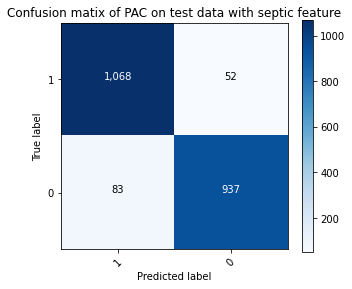

Accuracy 1: 94.07%
[[1063   57]
 [  70  950]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1120
           1       0.94      0.93      0.94      1020

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Accuracy :  0.9406542056074766
Precison :  0.9407619391214428
Recall :  0.9406542056074766
F1 :  0.940673295206361


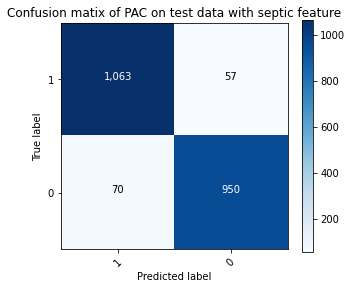

Accuracy 2: 94.21%
[[1070   50]
 [  74  946]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1120
           1       0.95      0.93      0.94      1020

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Accuracy :  0.9420560747663551
Precison :  0.9423690410743737
Recall :  0.9420560747663551
F1 :  0.9420938558045986


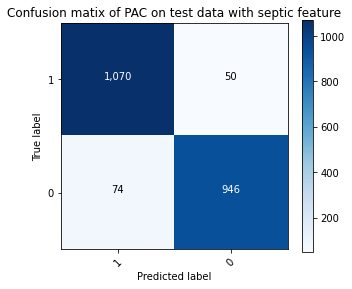

Accuracy 3: 94.02%
[[1066   54]
 [  74  946]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1120
           1       0.95      0.93      0.94      1020

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Accuracy :  0.9401869158878504
Precison :  0.9404143433074165
Recall :  0.9401869158878504
F1 :  0.9402183606004303


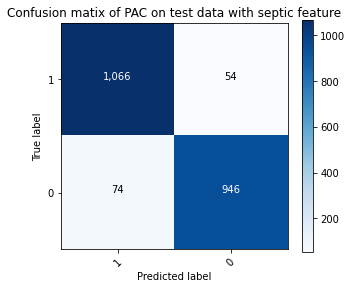

Accuracy 4: 94.16%
[[1070   50]
 [  75  945]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1120
           1       0.95      0.93      0.94      1020

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Accuracy :  0.9415887850467289
Precison :  0.9419262447969843
Recall :  0.9415887850467289
F1 :  0.9416287797983937


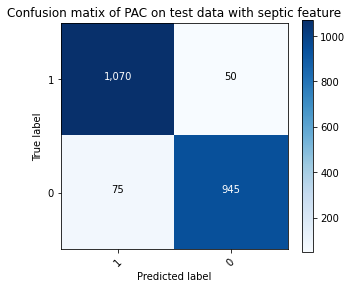

Accuracy 5: 93.93%
[[1066   54]
 [  76  944]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1120
           1       0.95      0.93      0.94      1020

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Accuracy :  0.9392523364485982
Precison :  0.9395226642058692
Recall :  0.9392523364485982
F1 :  0.9392880553693309


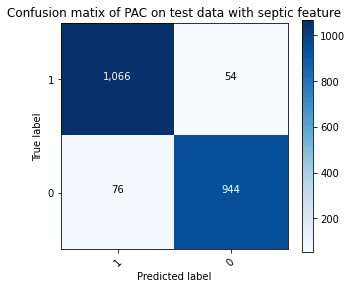

In [134]:
from scipy import sparse
for k in range(0,6):
    y111=[]
    for a in y11[k]:
        if int(a)==0:
            #good true 
            y111.append("realnews")
        else:
            #bad fake false
            y111.append("fakenews")
    #print(y111)
    y11[k]=tfidf_vectorizer.transform(y111)
    #print(y11[k])

    y112=[]
    for a in y12[k]:
        if int(a)==0:
            y112.append("realnews")
        else:
            y112.append("fakenews")
    #print(y111)
    y12[k]=tfidf_vectorizer.transform(y112)
    #print(y12[k])
    
    
    ##################################################
    
    y11[k] = sparse.csr_matrix(y11[k]) 
    y12[k] = sparse.csr_matrix(y12[k]) 
    x_train2 = sparse.hstack((tfidf_train,y11[k])) 
    x_test2 = sparse.hstack((tfidf_test,y12[k])) 
    
    
    ##################################################
    
    #DataFlair - Predict on the test set and calculate accuracy
    pac=PassiveAggressiveClassifier(max_iter=50)
    pac.fit(x_train2,y_train)
    y_pred11=pac.predict(x_test2)
    score=accuracy_score(y_test,y_pred11)
    print(f'Accuracy {k}: {round(score*100,2)}%')
    print_metrices(y_pred11,y_test)
    plot_confusion_matrix(confusion_matrix(y_test,y_pred11),target_names=[1,0], normalize = False, \
                      title = 'Confusion matix of PAC on test data with septic feature')

**Linear SVM using Septic Property**

In [135]:
y11=[np.round(y[:,0]),np.round(y[:,1]),np.round(y[:,2]),np.round(y[:,3]),np.round(y[:,4]),np.round(y[:,5])]
y12=[np.round(y1[:,0]),np.round(y1[:,1]),np.round(y1[:,2]),np.round(y1[:,3]),np.round(y1[:,4]),np.round(y1[:,5])]


SVM
test:
Accuracy of Linear SVC 0: 94.02%
[[1053   67]
 [  61  959]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1120
           1       0.93      0.94      0.94      1020

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Accuracy :  0.9401869158878504
Precison :  0.9401869649729051
Recall :  0.9401869158878504
F1 :  0.9401795353756562


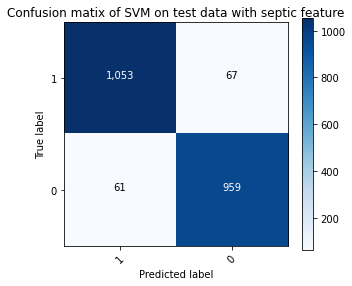

SVM
test:
Accuracy of Linear SVC 1: 94.07%
[[1055   65]
 [  62  958]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1120
           1       0.94      0.94      0.94      1020

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Accuracy :  0.9406542056074766
Precison :  0.9406503524306918
Recall :  0.9406542056074766
F1 :  0.9406504268537729


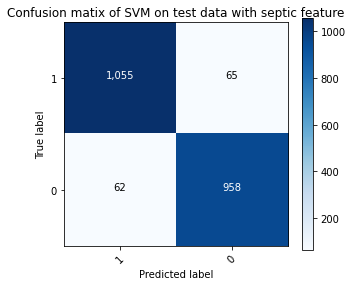

SVM
test:
Accuracy of Linear SVC 2: 93.83%
[[1041   79]
 [  53  967]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1120
           1       0.92      0.95      0.94      1020

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Accuracy :  0.9383177570093458
Precison :  0.9385434337286317
Recall :  0.9383177570093458
F1 :  0.938291811793275


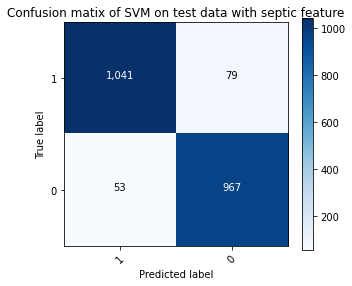

SVM
test:
Accuracy of Linear SVC 3: 94.02%
[[1054   66]
 [  62  958]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1120
           1       0.94      0.94      0.94      1020

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Accuracy :  0.9401869158878504
Precison :  0.9401834472106599
Recall :  0.9401869158878504
F1 :  0.9401818904404703


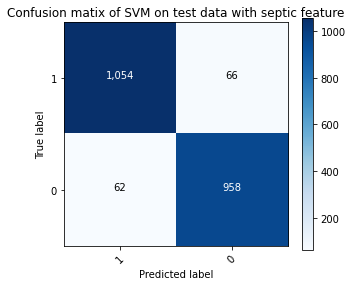

SVM
test:
Accuracy of Linear SVC 4: 94.02%
[[1054   66]
 [  62  958]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1120
           1       0.94      0.94      0.94      1020

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Accuracy :  0.9401869158878504
Precison :  0.9401834472106599
Recall :  0.9401869158878504
F1 :  0.9401818904404703


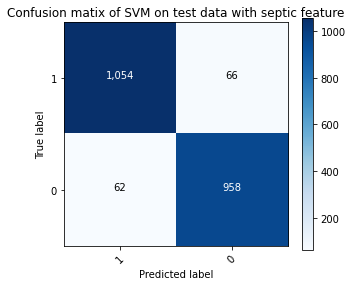

SVM
test:
Accuracy of Linear SVC 5: 94.07%
[[1055   65]
 [  62  958]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1120
           1       0.94      0.94      0.94      1020

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Accuracy :  0.9406542056074766
Precison :  0.9406503524306918
Recall :  0.9406542056074766
F1 :  0.9406504268537729


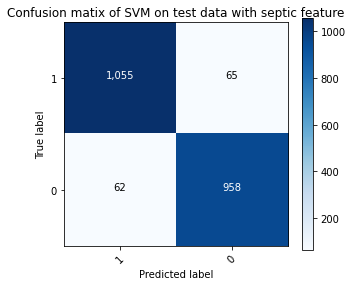

In [136]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LinearSVC())
    ])
from scipy import sparse
for k in range(0,6):
  Y11=[]
  Y12=[]
  ##################################################
  x_train2=[]
  x_test2=[]
  
  for i in range(0,len(y11[k])):
    if int(y11[k][i])==0:
      x_train2.append(train[i]+" real")
    else:
      x_train2.append(train[i]+" fake")
  
  for i in range(0,len(y12[k])):
    if int(y12[k][i])==0:
      x_test2.append(test[i]+" real")
    else:
      x_test2.append(test[i]+" fake")
    

  ##################################################

  fit = pipeline.fit(x_train2,y_train)
  print('SVM')
  print ('test:')
  pred=pipeline.predict(x_test2)
  score=accuracy_score(y_test,pred)
  print(f'Accuracy of Linear SVC {k}: {round(score*100,2)}%')
  print_metrices(pred,y_test)
  plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[1,0], normalize = False, \
                      title = 'Confusion matix of SVM on test data with septic feature')

**Logistic Regression Using Septic Property**

In [137]:
y11=[np.round(y[:,0]),np.round(y[:,1]),np.round(y[:,2]),np.round(y[:,3]),np.round(y[:,4]),np.round(y[:,5])]
y12=[np.round(y1[:,0]),np.round(y1[:,1]),np.round(y1[:,2]),np.round(y1[:,3]),np.round(y1[:,4]),np.round(y1[:,5])]


Logistic Regression
test:
Accuracy of Logistic Regression 0: 92.76%
[[1036   84]
 [  71  949]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1120
           1       0.92      0.93      0.92      1020

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140

Accuracy :  0.927570093457944
Precison :  0.9276028495510353
Recall :  0.927570093457944
F1 :  0.927552176207536


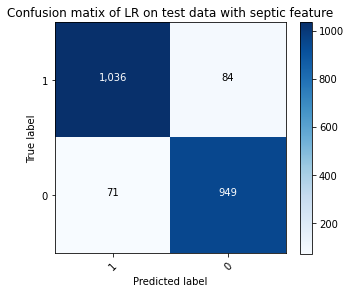

Logistic Regression
test:
Accuracy of Logistic Regression 1: 92.66%
[[1031   89]
 [  68  952]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1120
           1       0.91      0.93      0.92      1020

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140

Accuracy :  0.9266355140186916
Precison :  0.9267610981308411
Recall :  0.9266355140186916
F1 :  0.926608900826453


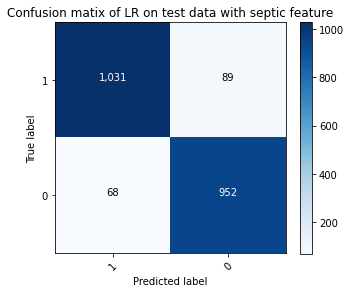

Logistic Regression
test:
Accuracy of Logistic Regression 2: 92.48%
[[1020  100]
 [  61  959]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1120
           1       0.91      0.94      0.92      1020

    accuracy                           0.92      2140
   macro avg       0.92      0.93      0.92      2140
weighted avg       0.93      0.92      0.92      2140

Accuracy :  0.9247663551401869
Precison :  0.9253036401476478
Recall :  0.9247663551401869
F1 :  0.9247272411598737


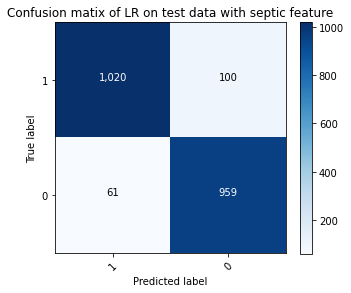

Logistic Regression
test:
Accuracy of Logistic Regression 3: 92.48%
[[1028   92]
 [  69  951]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1120
           1       0.91      0.93      0.92      1020

    accuracy                           0.92      2140
   macro avg       0.92      0.93      0.92      2140
weighted avg       0.93      0.92      0.92      2140

Accuracy :  0.9247663551401869
Precison :  0.924922151103432
Recall :  0.9247663551401869
F1 :  0.9247372234459643


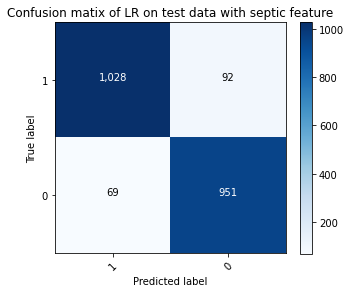

Logistic Regression
test:
Accuracy of Logistic Regression 4: 92.48%
[[1028   92]
 [  69  951]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1120
           1       0.91      0.93      0.92      1020

    accuracy                           0.92      2140
   macro avg       0.92      0.93      0.92      2140
weighted avg       0.93      0.92      0.92      2140

Accuracy :  0.9247663551401869
Precison :  0.924922151103432
Recall :  0.9247663551401869
F1 :  0.9247372234459643


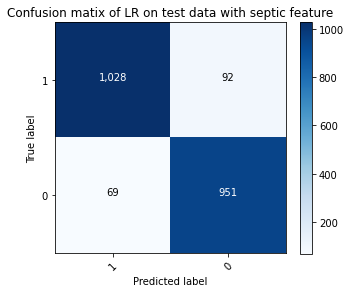

Logistic Regression
test:
Accuracy of Logistic Regression 5: 92.66%
[[1031   89]
 [  68  952]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1120
           1       0.91      0.93      0.92      1020

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140

Accuracy :  0.9266355140186916
Precison :  0.9267610981308411
Recall :  0.9266355140186916
F1 :  0.926608900826453


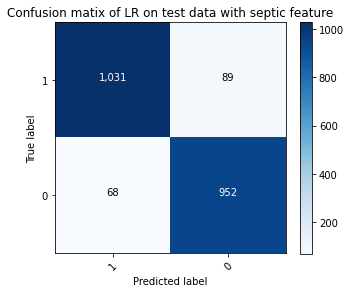

In [138]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LogisticRegression())
    ])
from scipy import sparse
for k in range(0,6):
  ##################################################
  x_train2=[]
  x_test2=[]
  
  for i in range(0,len(y11[k])):
    if int(y11[k][i])==0:
      x_train2.append(train[i]+" real")
    else:
      x_train2.append(train[i]+" fake")
  
  for i in range(0,len(y12[k])):
    if int(y12[k][i])==0:
      x_test2.append(test[i]+" real")
    else:
      x_test2.append(test[i]+" fake")
    

  ##################################################
    
  fit = pipeline.fit(x_train2,y_train)
  print('Logistic Regression')
  print ('test:')
  pred=pipeline.predict(x_test2)
  score=accuracy_score(y_test,pred)
  print(f'Accuracy of Logistic Regression {k}: {round(score*100,2)}%')
  print_metrices(pred,y_test)
  plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[1,0], normalize = False, \
                      title = 'Confusion matix of LR on test data with septic feature')

**Gradient Boosting Classifier Using Septic Property**

In [139]:
y11=[np.round(y[:,0]),np.round(y[:,1]),np.round(y[:,2]),np.round(y[:,3]),np.round(y[:,4]),np.round(y[:,5])]
y12=[np.round(y1[:,0]),np.round(y1[:,1]),np.round(y1[:,2]),np.round(y1[:,3]),np.round(y1[:,4]),np.round(y1[:,5])]


Gradient Boosting Classifier
test:
Accuracy of Gradient Boosting Classifier 0: 88.27%
[[967 153]
 [ 98 922]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1120
           1       0.86      0.90      0.88      1020

    accuracy                           0.88      2140
   macro avg       0.88      0.88      0.88      2140
weighted avg       0.88      0.88      0.88      2140

Accuracy :  0.8827102803738318
Precison :  0.8837519061362863
Recall :  0.8827102803738318
F1 :  0.8826468642515237


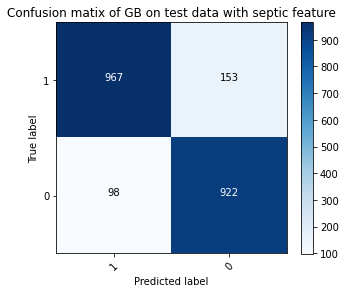

Gradient Boosting Classifier
test:
Accuracy of Gradient Boosting Classifier 1: 88.36%
[[971 149]
 [100 920]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1120
           1       0.86      0.90      0.88      1020

    accuracy                           0.88      2140
   macro avg       0.88      0.88      0.88      2140
weighted avg       0.88      0.88      0.88      2140

Accuracy :  0.8836448598130842
Precison :  0.8844461815099872
Recall :  0.8836448598130842
F1 :  0.8835813309603736


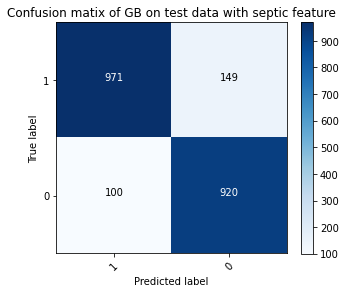

Gradient Boosting Classifier
test:
Accuracy of Gradient Boosting Classifier 2: 87.01%
[[938 182]
 [ 96 924]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1120
           1       0.84      0.91      0.87      1020

    accuracy                           0.87      2140
   macro avg       0.87      0.87      0.87      2140
weighted avg       0.87      0.87      0.87      2140

Accuracy :  0.8700934579439252
Precison :  0.8728415338097856
Recall :  0.8700934579439252
F1 :  0.8700593033952907


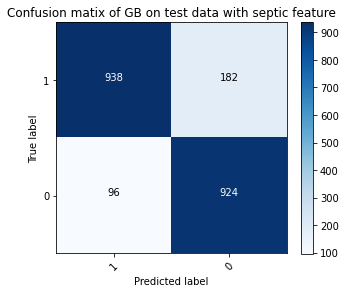

Gradient Boosting Classifier
test:
Accuracy of Gradient Boosting Classifier 3: 88.32%
[[971 149]
 [101 919]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1120
           1       0.86      0.90      0.88      1020

    accuracy                           0.88      2140
   macro avg       0.88      0.88      0.88      2140
weighted avg       0.88      0.88      0.88      2140

Accuracy :  0.883177570093458
Precison :  0.8839405481818896
Recall :  0.883177570093458
F1 :  0.8831138612425148


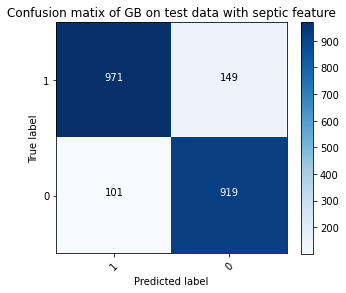

Gradient Boosting Classifier
test:
Accuracy of Gradient Boosting Classifier 4: 88.36%
[[971 149]
 [100 920]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1120
           1       0.86      0.90      0.88      1020

    accuracy                           0.88      2140
   macro avg       0.88      0.88      0.88      2140
weighted avg       0.88      0.88      0.88      2140

Accuracy :  0.8836448598130842
Precison :  0.8844461815099872
Recall :  0.8836448598130842
F1 :  0.8835813309603736


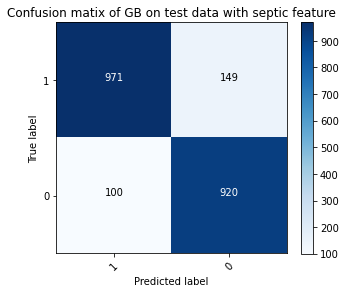

Gradient Boosting Classifier
test:
Accuracy of Gradient Boosting Classifier 5: 88.46%
[[970 150]
 [ 97 923]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1120
           1       0.86      0.90      0.88      1020

    accuracy                           0.88      2140
   macro avg       0.88      0.89      0.88      2140
weighted avg       0.89      0.88      0.88      2140

Accuracy :  0.8845794392523364
Precison :  0.8855411300034033
Recall :  0.8845794392523364
F1 :  0.8845166277912176


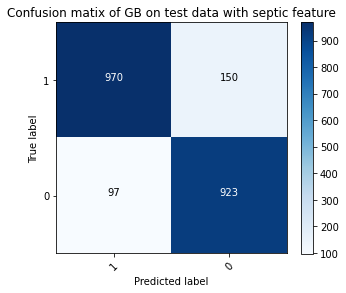

In [140]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', GradientBoostingClassifier())
    ])
from scipy import sparse
for k in range(0,6):
  ##################################################
  x_train2=[]
  x_test2=[]
  
  for i in range(0,len(y11[k])):
    if int(y11[k][i])==0:
      x_train2.append(train[i]+" realnews")
    else:
      x_train2.append(train[i]+" fakenews")
  
  for i in range(0,len(y12[k])):
    if int(y12[k][i])==0:
      x_test2.append(test[i]+" realnews")
    else:
      x_test2.append(test[i]+" fakenews")
    

  ##################################################
    
  fit = pipeline.fit(x_train2,y_train)
  print('Gradient Boosting Classifier')
  print ('test:')
  pred=pipeline.predict(x_test2)
  score=accuracy_score(y_test,pred)
  print(f'Accuracy of Gradient Boosting Classifier {k}: {round(score*100,2)}%')
  print_metrices(pred,y_test)
  plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[1,0], normalize = False, \
                      title = 'Confusion matix of GB on test data with septic feature')

**Decision Tree Using Septic Property**

In [141]:
y11=[np.round(y[:,0]),np.round(y[:,1]),np.round(y[:,2]),np.round(y[:,3]),np.round(y[:,4]),np.round(y[:,5])]
y12=[np.round(y1[:,0]),np.round(y1[:,1]),np.round(y1[:,2]),np.round(y1[:,3]),np.round(y1[:,4]),np.round(y1[:,5])]


Accuracy of DT 0: 86.92%
[[985 135]
 [145 875]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1120
           1       0.87      0.86      0.86      1020

    accuracy                           0.87      2140
   macro avg       0.87      0.87      0.87      2140
weighted avg       0.87      0.87      0.87      2140

Accuracy :  0.8691588785046729
Precison :  0.8692599119086887
Recall :  0.8691588785046729
F1 :  0.8691903892290614


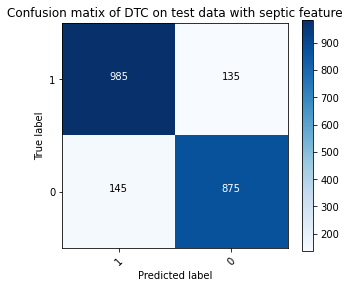

Accuracy of DT 1: 86.82%
[[990 130]
 [152 868]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1120
           1       0.87      0.85      0.86      1020

    accuracy                           0.87      2140
   macro avg       0.87      0.87      0.87      2140
weighted avg       0.87      0.87      0.87      2140

Accuracy :  0.8682242990654205
Precison :  0.8685630186654101
Recall :  0.8682242990654205
F1 :  0.8683017816473182


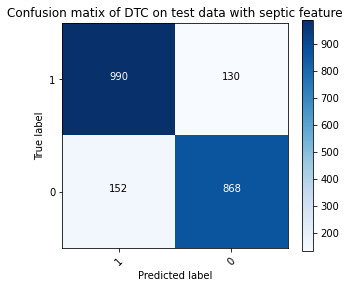

Accuracy of DT 2: 84.35%
[[969 151]
 [184 836]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1120
           1       0.85      0.82      0.83      1020

    accuracy                           0.84      2140
   macro avg       0.84      0.84      0.84      2140
weighted avg       0.84      0.84      0.84      2140

Accuracy :  0.8434579439252337
Precison :  0.8441606701091652
Recall :  0.8434579439252337
F1 :  0.843608552537307


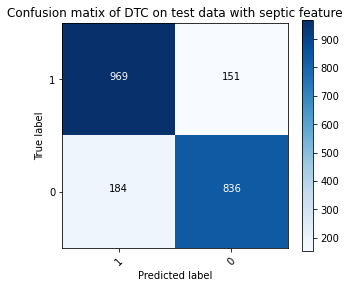

Accuracy of DT 3: 86.54%
[[979 141]
 [147 873]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1120
           1       0.86      0.86      0.86      1020

    accuracy                           0.87      2140
   macro avg       0.87      0.86      0.87      2140
weighted avg       0.87      0.87      0.87      2140

Accuracy :  0.8654205607476636
Precison :  0.865471658289484
Recall :  0.8654205607476636
F1 :  0.865439296672245


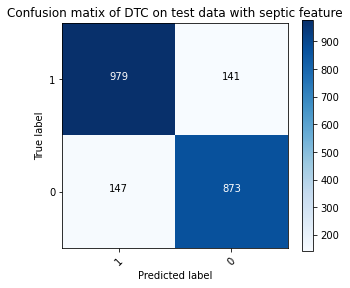

Accuracy of DT 4: 86.78%
[[983 137]
 [146 874]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1120
           1       0.86      0.86      0.86      1020

    accuracy                           0.87      2140
   macro avg       0.87      0.87      0.87      2140
weighted avg       0.87      0.87      0.87      2140

Accuracy :  0.8677570093457944
Precison :  0.8678445525406423
Recall :  0.8677570093457944
F1 :  0.8677854109120536


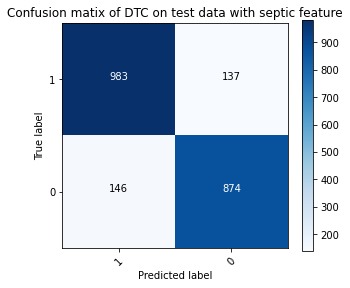

Accuracy of DT 5: 86.64%
[[990 130]
 [156 864]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1120
           1       0.87      0.85      0.86      1020

    accuracy                           0.87      2140
   macro avg       0.87      0.87      0.87      2140
weighted avg       0.87      0.87      0.87      2140

Accuracy :  0.8663551401869158
Precison :  0.8668030903950364
Recall :  0.8663551401869158
F1 :  0.8664510751209188


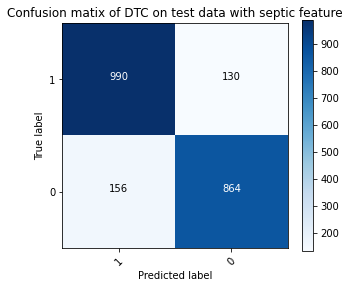

In [142]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', tree.DecisionTreeClassifier())
    ])

for k in range(0,6):
  ##################################################
  x_train2=[]
  x_test2=[]
  
  for i in range(0,len(y11[k])):
    if int(y11[k][i])==0:
      x_train2.append(train[i]+" realnews")
    else:
      x_train2.append(train[i]+" fakenews")
  
  for i in range(0,len(y12[k])):
    if int(y12[k][i])==0:
      x_test2.append(test[i]+" realnews")
    else:
      x_test2.append(test[i]+" fakenews")
    
    

  ##################################################

  fit = pipeline.fit(x_train2, y_train)
  pred=pipeline.predict(x_test2)

  score=accuracy_score(y_test,pred)
  print(f'Accuracy of DT {k}: {round(score*100,2)}%')
  print_metrices(pred,y_test)
  plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[1,0], normalize = False, \
                      title = 'Confusion matix of DTC on test data with septic feature')

**Random Forest Using Septic Property**

In [143]:
y11=[np.round(y[:,0]),np.round(y[:,1]),np.round(y[:,2]),np.round(y[:,3]),np.round(y[:,4]),np.round(y[:,5])]
y12=[np.round(y1[:,0]),np.round(y1[:,1]),np.round(y1[:,2]),np.round(y1[:,3]),np.round(y1[:,4]),np.round(y1[:,5])]


Accuracy of RFC 0: 91.96%
[[1029   91]
 [  81  939]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1120
           1       0.91      0.92      0.92      1020

    accuracy                           0.92      2140
   macro avg       0.92      0.92      0.92      2140
weighted avg       0.92      0.92      0.92      2140

Accuracy :  0.9196261682242991
Precison :  0.919634758108851
Recall :  0.9196261682242991
F1 :  0.919610344873408


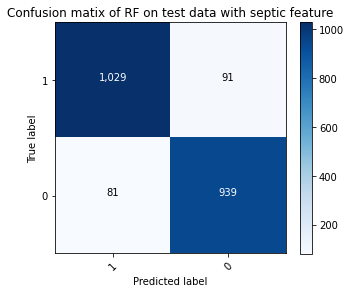

Accuracy of RFC 1: 91.68%
[[1019  101]
 [  77  943]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1120
           1       0.90      0.92      0.91      1020

    accuracy                           0.92      2140
   macro avg       0.92      0.92      0.92      2140
weighted avg       0.92      0.92      0.92      2140

Accuracy :  0.9168224299065421
Precison :  0.9169871593497213
Recall :  0.9168224299065421
F1 :  0.9167892594374005


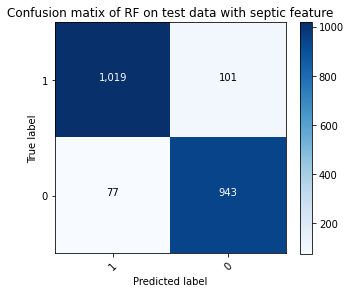

Accuracy of RFC 2: 90.84%
[[994 126]
 [ 70 950]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1120
           1       0.88      0.93      0.91      1020

    accuracy                           0.91      2140
   macro avg       0.91      0.91      0.91      2140
weighted avg       0.91      0.91      0.91      2140

Accuracy :  0.908411214953271
Precison :  0.9095592816565878
Recall :  0.908411214953271
F1 :  0.9083619158421183


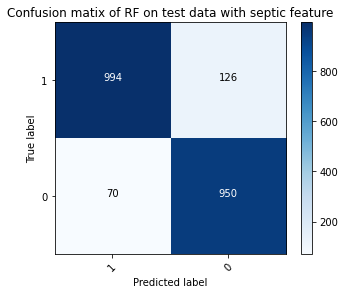

Accuracy of RFC 3: 92.15%
[[1026   94]
 [  74  946]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1120
           1       0.91      0.93      0.92      1020

    accuracy                           0.92      2140
   macro avg       0.92      0.92      0.92      2140
weighted avg       0.92      0.92      0.92      2140

Accuracy :  0.9214953271028037
Precison :  0.9216016780543994
Recall :  0.9214953271028037
F1 :  0.9214678611103617


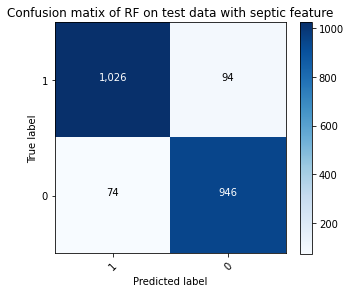

Accuracy of RFC 4: 91.92%
[[1027   93]
 [  80  940]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1120
           1       0.91      0.92      0.92      1020

    accuracy                           0.92      2140
   macro avg       0.92      0.92      0.92      2140
weighted avg       0.92      0.92      0.92      2140

Accuracy :  0.9191588785046729
Precison :  0.9191868488049424
Recall :  0.9191588785046729
F1 :  0.9191388805413145


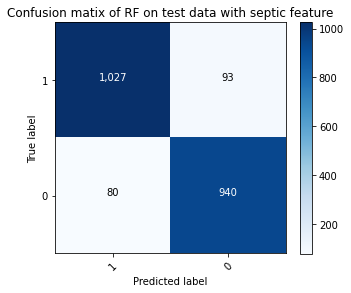

Accuracy of RFC 5: 91.78%
[[1020  100]
 [  76  944]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1120
           1       0.90      0.93      0.91      1020

    accuracy                           0.92      2140
   macro avg       0.92      0.92      0.92      2140
weighted avg       0.92      0.92      0.92      2140

Accuracy :  0.9177570093457944
Precison :  0.9179227204900652
Recall :  0.9177570093457944
F1 :  0.9177242115785534


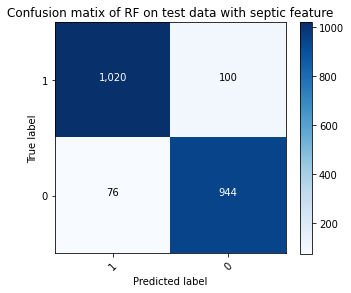

In [144]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', RandomForestClassifier())
    ])

for k in range(0,6):
  Y11 = []
  Y12 = []
  ##################################################
  x_train2=[]
  x_test2=[]
  
  for i in range(0,len(y11[k])):
    if int(y11[k][i])==0:
      x_train2.append(train[i]+" realnews")
    else:
      x_train2.append(train[i]+" fakenews")
  
  for i in range(0,len(y12[k])):
    if int(y12[k][i])==0:
      x_test2.append(test[i]+" realnews")
    else:
      x_test2.append(test[i]+" fakenews")
    

  ##################################################

  fit = pipeline.fit(x_train2,y_train)
  pred=pipeline.predict(x_test2)

  score=accuracy_score(y_test,pred)
  print(f'Accuracy of RFC {k}: {round(score*100,2)}%')
  print_metrices(pred,y_test)
  plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[1,0], normalize = False, \
                      title = 'Confusion matix of RF on test data with septic feature')